In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os


In [13]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [4]:
import os 

In [8]:
import cv2
X_train=[]
Y_train=[]
image_size=150
labels = ['glioma','meningioma','notumor','pituitary']
for i in labels:
    folderPath = os.path.join("/Users/hitteshkumarm/Desktop/COLLEGE/PROJECTS/BRAIN TUMOR CLASSIFICATION/archive/Training",i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join(r'/Users/hitteshkumarm/Desktop/COLLEGE/PROJECTS/BRAIN TUMOR CLASSIFICATION/archive/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [9]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(11424, 150, 150, 3)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [11]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [20]:
from sklearn.linear_model import LogisticRegression

In [18]:
# Initialize the model
model = Sequential()

# Use a pretrained MobileNetV2 model as a base (without the top classification layers)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add the pretrained base model to the custom model
model.add(base_model)

# Add additional layers for fine-tuning
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(4, activation='softmax'))

# Freeze the weights of the pretrained base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with a lower learning rate (e.g., 0.001) and Adam optimizer
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Print a summary of the model's architecture
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 256)         2949376   
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 1, 1, 256)         0         
 g2D)                                                            
                                                                 
 batch_normalization_1 (Bat  (None, 1, 1, 256)         1024      
 chNormalization)                                                
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                      

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 256)         2949376   
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 1, 1, 256)         0         
 g2D)                                                            
                                                                 
 batch_normalization_1 (Bat  (None, 1, 1, 256)         1024      
 chNormalization)                                                
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                      

In [20]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [21]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
290/290 [==============================] - 35s 119ms/step - loss: 0.3822 - accuracy: 0.8647 - val_loss: 0.3294 - val_accuracy: 0.8824
Epoch 2/20
290/290 [==============================] - 33s 115ms/step - loss: 0.1933 - accuracy: 0.9288 - val_loss: 0.1766 - val_accuracy: 0.9378
Epoch 3/20
290/290 [==============================] - 34s 117ms/step - loss: 0.1292 - accuracy: 0.9527 - val_loss: 0.1153 - val_accuracy: 0.9572
Epoch 4/20
290/290 [==============================] - 34s 119ms/step - loss: 0.0858 - accuracy: 0.9696 - val_loss: 0.1433 - val_accuracy: 0.9495
Epoch 5/20
290/290 [==============================] - 34s 117ms/step - loss: 0.0722 - accuracy: 0.9730 - val_loss: 0.1213 - val_accuracy: 0.9592
Epoch 6/20
290/290 [==============================] - 32s 112ms/step - loss: 0.0581 - accuracy: 0.9798 - val_loss: 0.2395 - val_accuracy: 0.9397
Epoch 7/20
290/290 [==============================] - 32s 109ms/step - loss: 0.0510 - accuracy: 0.9809 - val_loss: 0.1187 - val_ac

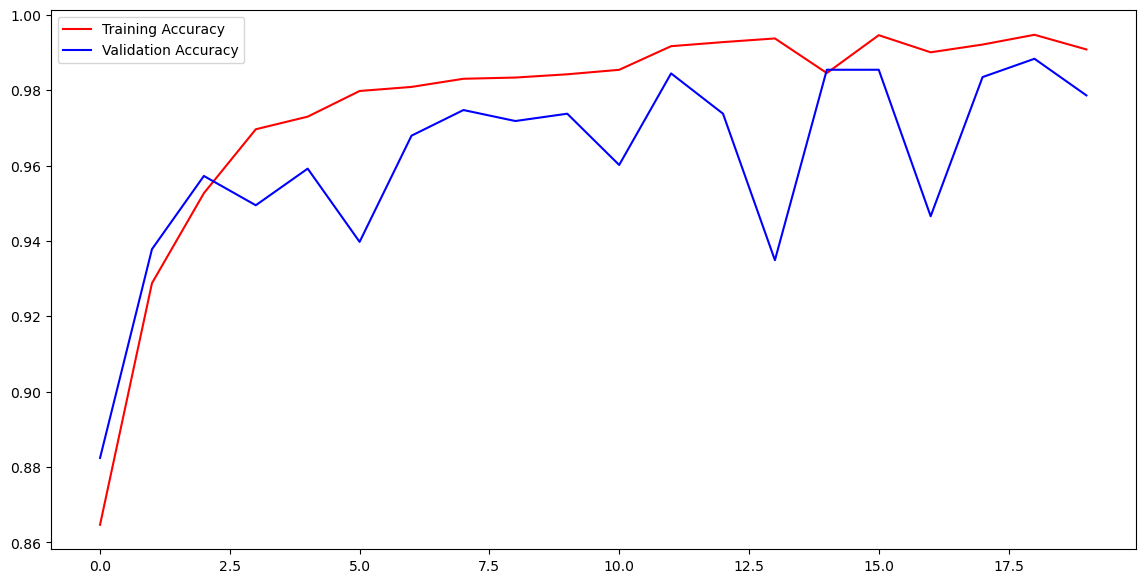

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

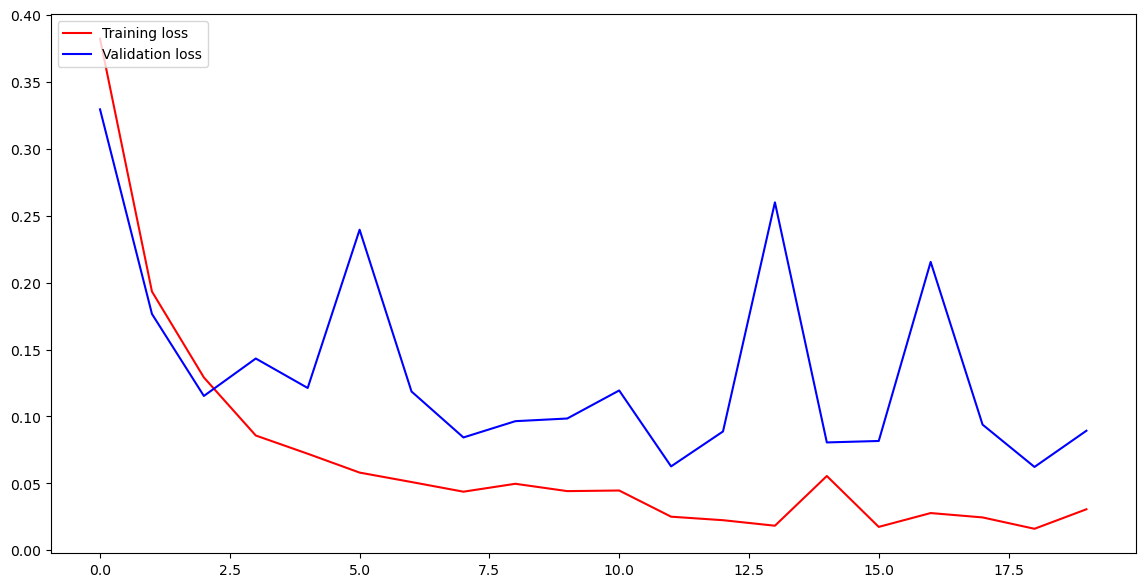

In [23]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

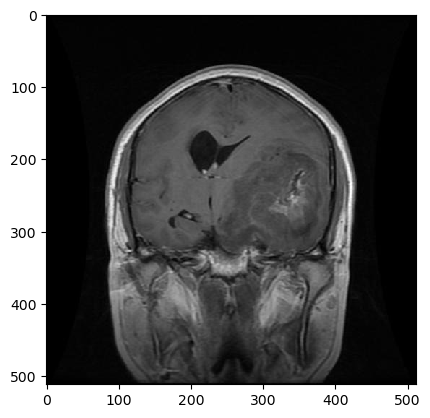

1/1 [==============================] - 0s 289ms/step
glioma


In [25]:
from tensorflow.keras.preprocessing import image
img = cv2.imread("/Users/hitteshkumarm/Desktop/COLLEGE/PROJECTS/BRAIN TUMOR CLASSIFICATION/archive/Testing/glioma/Te-gl_0048.jpg")
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array = img_array.reshape(1,150,150,3)
img_array.shape
img = image.load_img("/Users/hitteshkumarm/Desktop/COLLEGE/PROJECTS/BRAIN TUMOR CLASSIFICATION/archive/Testing/glioma/Te-gl_0048.jpg")
plt.imshow(img,interpolation='nearest')
plt.show()
a=model.predict(img_array)
indices = a.argmax()
indices
print(labels[indices])

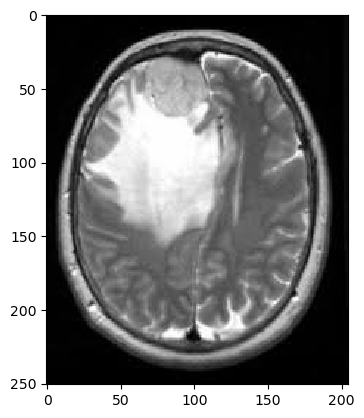

1/1 [==============================] - 0s 24ms/step
meningioma


In [29]:
from tensorflow.keras.preprocessing import image
img = cv2.imread("/Users/hitteshkumarm/Desktop/COLLEGE/PROJECTS/BRAIN TUMOR CLASSIFICATION/archive/Testing/meningioma/Te-me_0036.jpg")
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array = img_array.reshape(1,150,150,3)
img_array.shape
img = image.load_img("/Users/hitteshkumarm/Desktop/COLLEGE/PROJECTS/BRAIN TUMOR CLASSIFICATION/archive/Testing/meningioma/Te-me_0036.jpg")
plt.imshow(img,interpolation='nearest')
plt.show()
a=model.predict(img_array)
indices = a.argmax()
indices
print(labels[indices])

In [26]:
Y_pred=model.predict(X_test)
Y_pred

36/36 [==============================] - 3s 83ms/step


array([[2.8363393e-05, 9.9891150e-01, 1.0592532e-03, 8.6999802e-07],
       [2.9827120e-02, 9.7016215e-01, 4.1076870e-10, 1.0712095e-05],
       [2.0425776e-03, 9.9791664e-01, 2.9029684e-08, 4.0783387e-05],
       ...,
       [6.9790166e-03, 9.9302095e-01, 6.8813627e-10, 3.2535066e-08],
       [2.9473382e-08, 4.3761838e-07, 9.9999487e-01, 4.6327700e-06],
       [9.7435289e-12, 1.3851807e-11, 1.0000000e+00, 8.2791246e-11]],
      dtype=float32)

In [27]:
loss, acc = model.evaluate(x=X_test, y=y_test)

36/36 [==============================] - 3s 85ms/step - loss: 0.0924 - accuracy: 0.9773


In [28]:
print (f"Test Loss = {loss}")
print (f"Test Accuracy = {acc}")

Test Loss = 0.09238443523645401
Test Accuracy = 0.9772528409957886
